In [ ]:
import pandas as pd
import os
import tqdm
import json
import polars as pl
import numpy as np
import seaborn as sns

# Text embedding for `about` columns

In [ ]:
from sklearn.datasets import make_blobs
# from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

In [ ]:
course = pd.read_json('/kaggle/input/mooccubex-ds317/entities_preprocessed/course_PREPROCESSED.json', lines=True)
course.head()

,id,name_trans,field,prerequisites_trans,about_trans,resource,about_length,name_length,resource_length,field_count,has_prerequisites
0,C_584313,"introduction to ""zi zhi tong jian""","[history, chinese language and literature]",,"through the teacher's guidance, students can g...","[{'titles': ['第一课 导论与三家分晋', '导论', '导论'], 'reso...",221,34,91,2,False
1,C_584329,calculus - limit theory and functions of one v...,"[applied economics, math, physics, theoretical...",,this course is a basic mathematics course in s...,"[{'titles': ['序言', '序言', '序言'], 'resource_id':...",345,53,170,4,False
2,C_584381,photojournalism,"[art, journalism and communication]",,"master basic photography skills, understand ho...","[{'titles': ['第一章 绪论', '第一讲 引言1', '引言1'], 'res...",200,15,127,2,False
3,C_597208,data mining: theory and algorithms,[computer science and technology],,the most interesting theory + the most useful ...,"[{'titles': ['走进数据科学：博大精深，美不胜收', '整装待发', 'Vide...",82,34,125,1,False
4,C_597225,university computer,[],,university computer courses will be guided by ...,"[{'titles': ['第1周： 基于计算机的问题求解', '课程介绍', '开篇'],...",332,19,165,0,False


In [ ]:
!pip install -U sentence-transformers -q

In [ ]:
from sentence_transformers import SentenceTransformer

# 1. Load embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

course['about_embeddings'] = list(model.encode(course['about_trans']))

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/103 [00:00<?, ?it/s]

In [ ]:
# Convert embeddings into np array
embeddings = np.array(course['about_embeddings'].tolist())

# Calculate similarities
similarities = model.similarity(embeddings,embeddings)

In [ ]:
similarities

tensor([[1.0000, 0.1729, 0.1644,  ..., 0.2552, 0.1993, 0.3112],
        [0.1729, 1.0000, 0.1116,  ..., 0.0624, 0.1854, 0.1449],
        [0.1644, 0.1116, 1.0000,  ..., 0.1921, 0.0992, 0.3284],
        ...,
        [0.2552, 0.0624, 0.1921,  ..., 1.0000, 0.2210, 0.2522],
        [0.1993, 0.1854, 0.0992,  ..., 0.2210, 1.0000, 0.1402],
        [0.3112, 0.1449, 0.3284,  ..., 0.2522, 0.1402, 1.0000]])

In [ ]:
similarities.shape

torch.Size([3278, 3278])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


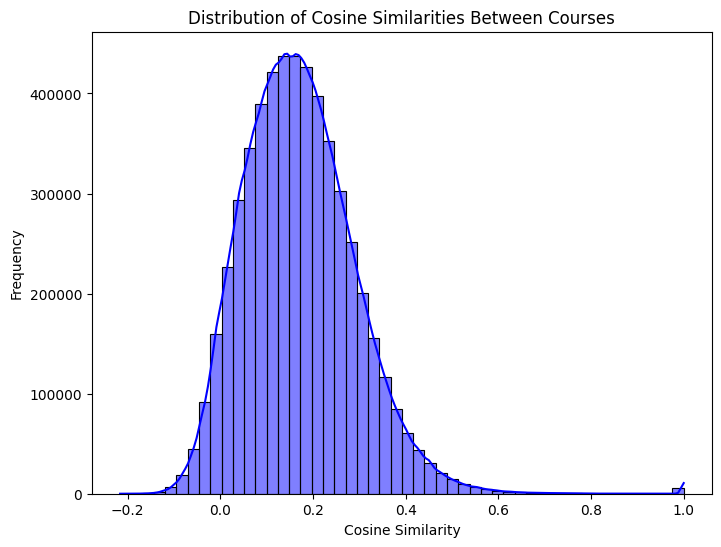

Mean Similarity: 0.1706
Median Similarity: 0.1622
Standard Deviation: 0.1199
Min Similarity: -0.2165
Max Similarity: 1.0000


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Excluding diagonal
tril_indices = np.triu_indices_from(similarities, k=1)
similarities_upper = similarities[tril_indices]

similarities_upper = np.array(similarities_upper)

# 2. Plot the distribution
plt.figure(figsize=(8, 6))
sns.histplot(similarities_upper, kde=True, bins=50, color='blue')
plt.title("Distribution of Cosine Similarities Between Courses")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

# 3. some statistics
mean_similarity = np.mean(similarities_upper)
median_similarity = np.median(similarities_upper)
std_similarity = np.std(similarities_upper)
min_similarity = np.min(similarities_upper)
max_similarity = np.max(similarities_upper)

print(f"Mean Similarity: {mean_similarity:.4f}")
print(f"Median Similarity: {median_similarity:.4f}")
print(f"Standard Deviation: {std_similarity:.4f}")
print(f"Min Similarity: {min_similarity:.4f}")
print(f"Max Similarity: {max_similarity:.4f}")

In [ ]:
PRE_DIR = '/kaggle/input/mooccubex-ds317/'
MODEL_DATA_DIR = '/kaggle/working/'

KG:
- Course
- Teacher
- School
- Fields
- Concepts

CKG:
- User-item interactions
- KG

Tables used:
- Entities:
    - Course Info
    - School
    - Teacher
    - Field/Discipline
    - Concept
    - Student Profile
- Relations:
    - course-field.json
    - course-school.txt
    - course-teacher.txt
    - concept-course
    
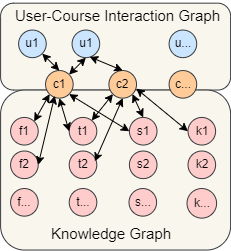

# N-core filtering

## User - item bipartite graph filtering

5 - core: Remove users, items less than 5 interactions


In [ ]:
N_CORE = 5

In [ ]:
interactions = pl.read_ndjson(os.path.join(PRE_DIR, 'entities_preprocessed/user_PREPROCESSED.json')) \
            .select(['id', 'course_order', 'enroll_time']) \
            .explode('course_order', 'enroll_time') \
            .rename({'course_order': 'course', 'id': 'user'}) \
            .with_columns(pl.col('course').map_elements(lambda c: f'C_{str(c)}'))
interactions

/tmp/ipykernel_30/900710410.py:5: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  .with_columns(pl.col('course').map_elements(lambda c: f'C_{str(c)}'))


user,course,enroll_time
str,str,str
"""U_24""","""C_597214""","""2019-05-20 16:06:48"""
"""U_24""","""C_605512""","""2019-05-24 19:34:43"""
"""U_24""","""C_597211""","""2019-06-11 02:50:04"""
"""U_24""","""C_597314""","""2019-06-12 17:22:07"""
"""U_24""","""C_597208""","""2019-06-17 15:22:41"""
…,…,…
"""U_34702982""","""C_1875524""","""2020-10-12 15:29:41"""
"""U_34702982""","""C_707067""","""2020-10-17 12:02:22"""
"""U_34702982""","""C_947240""","""2020-10-17 12:02:39"""


In [ ]:
interactions.describe()

statistic,user,course,enroll_time
str,str,str,str
"""count""","""1183774""","""1183774""","""1183774"""
"""null_count""","""0""","""0""","""0"""
"""mean""",null,null,null
"""std""",null,null,null
"""min""","""U_1000129""","""C_1011639""","""2019-01-25 10:51:31"""
"""25%""",null,null,null
"""50%""",null,null,null
"""75%""",null,null,null
"""max""","""U_99996""","""C_956130""","""2020-12-08 02:43:08"""


In [ ]:
def filter_n_core_interactions(interactions):
    old_size = -1

    while (old_size != interactions.shape[0]):
        old_size = interactions.shape[0]

        # Filter users who enrolled less than N-core courses
        course_counts_of_user = interactions.group_by('user').count()
        valid_users = course_counts_of_user.filter(pl.col('count') >= N_CORE)['user']
        interactions = interactions.filter(pl.col('user').is_in(valid_users))

        # Filter courses which were enrolled by less than N-core users
        user_counts_of_course = interactions.group_by('course').count()
        valid_courses = user_counts_of_course.filter(pl.col('count') >= N_CORE)['course']
        interactions = interactions.filter(pl.col('course').is_in(valid_courses))

        print(f'New size: {interactions.shape[0]}')

    print('# of unique users   : ', interactions['user'].n_unique())
    print('# of unique courses : ', interactions['course'].n_unique())

    return interactions

In [ ]:
interactions = filter_n_core_interactions(interactions)

/tmp/ipykernel_30/1637032115.py:8: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  course_counts_of_user = interactions.group_by('user').count()
/tmp/ipykernel_30/1637032115.py:13: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  user_counts_of_course = interactions.group_by('course').count()


New size: 1182922
New size: 1182745
New size: 1182745
# of unique users   :  97722
# of unique courses :  3321


In [ ]:
interactions

user,course,enroll_time
str,str,str
"""U_24""","""C_597214""","""2019-05-20 16:06:48"""
"""U_24""","""C_605512""","""2019-05-24 19:34:43"""
"""U_24""","""C_597211""","""2019-06-11 02:50:04"""
"""U_24""","""C_597314""","""2019-06-12 17:22:07"""
"""U_24""","""C_597208""","""2019-06-17 15:22:41"""
…,…,…
"""U_34702982""","""C_1875524""","""2020-10-12 15:29:41"""
"""U_34702982""","""C_707067""","""2020-10-17 12:02:22"""
"""U_34702982""","""C_947240""","""2020-10-17 12:02:39"""


In [ ]:
interactions.write_csv(os.path.join(MODEL_DATA_DIR, 'interactions_n_core.txt'),
                       separator='\t', include_header=False)

## Knowledge Graph filtering

Remove entities less than 5 ocurrences in triplet and relations less than 25 ocurrences in triplets

### course-concept

In [ ]:
course_concept_df = pl.read_csv(os.path.join(PRE_DIR, 'relations/concept-course.txt'),
                                separator='\t', has_header=False, new_columns=['concept', 'course'])
course_concept_df

concept,course
str,str
"""concept_id""","""course_id"""
"""K_扩展_中国语言文学""","""C_584313"""
"""K_三朝_历史学""","""C_584313"""
"""K_阶级_历史学""","""C_584313"""
"""K_反复_中国语言文学""","""C_584313"""
…,…
"""K_控制逻辑_计算机科学与技术""","""C_2337996"""
"""K_等价变换的_计算机科学与技术""","""C_2337996"""
"""K_等价变换_计算机科学与技术""","""C_2337996"""


In [ ]:
course_concept_df = course_concept_df.rename({'course': 'h', 'concept': 't'}) \
                                    .with_columns(pl.lit('course.concept').alias('r')) \
                                    .select(['h', 'r', 't'])

course_concept_df

h,r,t
str,str,str
"""course_id""","""course.concept""","""concept_id"""
"""C_584313""","""course.concept""","""K_扩展_中国语言文学"""
"""C_584313""","""course.concept""","""K_三朝_历史学"""
"""C_584313""","""course.concept""","""K_阶级_历史学"""
"""C_584313""","""course.concept""","""K_反复_中国语言文学"""
…,…,…
"""C_2337996""","""course.concept""","""K_控制逻辑_计算机科学与技术"""
"""C_2337996""","""course.concept""","""K_等价变换的_计算机科学与技术"""
"""C_2337996""","""course.concept""","""K_等价变换_计算机科学与技术"""


### course-teacher

In [ ]:
course_teacher_df = pl.read_csv(os.path.join(PRE_DIR, 'relations/course-teacher_PREPROCESSED.txt'),
                                separator='\t', has_header=False, new_columns=['course', 'teacher'])
course_teacher_df

course,teacher
str,str
"""C_584313""","""T_20"""
"""C_597229""","""T_43"""
"""C_597365""","""T_155"""
"""C_629503""","""T_204"""
"""C_629503""","""T_206"""
…,…
"""C_2342515""","""T_16374"""
"""C_2342532""","""T_16280"""
"""C_2342532""","""T_16281"""


In [ ]:
course_teacher_df = course_teacher_df.rename({'course': 'h', 'teacher': 't'}) \
                                    .with_columns(pl.lit('course.teacher').alias('r')) \
                                    .select(['h', 'r', 't'])

course_teacher_df

h,r,t
str,str,str
"""C_584313""","""course.teacher""","""T_20"""
"""C_597229""","""course.teacher""","""T_43"""
"""C_597365""","""course.teacher""","""T_155"""
"""C_629503""","""course.teacher""","""T_204"""
"""C_629503""","""course.teacher""","""T_206"""
…,…,…
"""C_2342515""","""course.teacher""","""T_16374"""
"""C_2342532""","""course.teacher""","""T_16280"""
"""C_2342532""","""course.teacher""","""T_16281"""


### Course-school

In [ ]:
course_school_df = pl.read_csv(os.path.join(PRE_DIR, 'relations/course-school_PREPROCESSED.txt'),
                                separator='\t', has_header=False, new_columns=['course', 'school'])
course_school_df

course,school
str,str
"""C_584313""","""S_1"""
"""C_584329""","""S_1"""
"""C_584381""","""S_1"""
"""C_597208""","""S_1"""
"""C_597225""","""S_6"""
…,…
"""C_2343056""","""S_97"""
"""C_2343067""","""S_33"""
"""C_2343133""","""S_63"""


In [ ]:
course_school_df = course_school_df.rename({'course': 'h', 'school': 't'}) \
                                    .with_columns(pl.lit('course.school').alias('r')) \
                                    .select(['h', 'r', 't'])

course_school_df

h,r,t
str,str,str
"""C_584313""","""course.school""","""S_1"""
"""C_584329""","""course.school""","""S_1"""
"""C_584381""","""course.school""","""S_1"""
"""C_597208""","""course.school""","""S_1"""
"""C_597225""","""course.school""","""S_6"""
…,…,…
"""C_2343056""","""course.school""","""S_97"""
"""C_2343067""","""course.school""","""S_33"""
"""C_2343133""","""course.school""","""S_63"""


### Course - field

In [ ]:
course_field_df = pl.read_ndjson(os.path.join(PRE_DIR, 'entities_preprocessed/course_PREPROCESSED.json')) \
                    .select('id', 'field') \
                    .explode('field') \
                    .rename({'id': 'course'})

course_field_df

course,field
str,str
"""C_584313""","""history"""
"""C_584313""","""chinese language and literatur…"
"""C_584329""","""applied economics"""
"""C_584329""","""math"""
"""C_584329""","""physics"""
…,…
"""C_2338076""",null
"""C_2341259""",null
"""C_2337996""",null


In [ ]:
course_field_df.describe()

statistic,course,field
str,str,str
"""count""","""3409""","""659"""
"""null_count""","""0""","""2750"""
"""mean""",null,null
"""std""",null,null
"""min""","""C_1017355""","""agricultural and forestry econ…"
"""25%""",null,null
"""50%""",null,null
"""75%""",null,null
"""max""","""C_956130""","""weapons science and technology"""


In [ ]:
course_field_df = course_field_df.drop_nulls().unique() \
                                .rename({'course': 'h', 'field': 't'}) \
                                .with_columns(pl.lit('course.field').alias('r')) \
                                .select(['h', 'r', 't'])
course_field_df

h,r,t
str,str,str
"""C_682602""","""course.field""","""optical engineering"""
"""C_735300""","""course.field""","""management science and enginee…"
"""C_681786""","""course.field""","""electronic science and technol…"
"""C_682261""","""course.field""","""chemical"""
"""C_682349""","""course.field""","""light industry technology and …"
…,…,…
"""C_737512""","""course.field""","""business administration"""
"""C_677109""","""course.field""","""chinese language and literatur…"
"""C_682324""","""course.field""","""philosophy"""


### course-about_similarity

In [ ]:
# Giữ các cặp khóa học có similarity > 0.7

threshold = 0.7

course_ids = course['id'].tolist()  # Danh sách course_id
valid_courses = set(n_core_interactions['course'])  # Danh sách khóa học hợp lệ

# Tạo relation
relations = []
for i in range(len(course_ids)):
    for j in range(len(course_ids)):
        if (
            i != j and similarities[i, j] > threshold and # Giữ các cặp vượt ngưỡng
            course_ids[i] in valid_courses and
            course_ids[j] in valid_courses ):
            relations.append({
                "h": course_ids[i],
                "r": "course.about_similarity",
                "t": course_ids[j]
            })


course_similarity_df = pl.DataFrame(relations)
course_similarity_df

h,r,t
str,str,str
"""C_584313""","""course.about_similarity""","""C_629514"""
"""C_584313""","""course.about_similarity""","""C_676671"""
"""C_584313""","""course.about_similarity""","""C_681075"""
"""C_584313""","""course.about_similarity""","""C_681666"""
"""C_584313""","""course.about_similarity""","""C_682813"""
…,…,…
"""C_2337996""","""course.about_similarity""","""C_2338069"""
"""C_2337996""","""course.about_similarity""","""C_2338020"""
"""C_2337996""","""course.about_similarity""","""C_2338005"""


### Filter invalid courses (not in interactions_n_core.txt) and filter KG

In [ ]:
n_core_interactions = pl.read_csv(os.path.join(MODEL_DATA_DIR, 'interactions_n_core.txt'),
                                  separator='\t', has_header=False, new_columns=['user', 'course', 'time'])

n_core_interactions

user,course,time
str,str,str
"""U_24""","""C_597214""","""2019-05-20 16:06:48"""
"""U_24""","""C_605512""","""2019-05-24 19:34:43"""
"""U_24""","""C_597211""","""2019-06-11 02:50:04"""
"""U_24""","""C_597314""","""2019-06-12 17:22:07"""
"""U_24""","""C_597208""","""2019-06-17 15:22:41"""
…,…,…
"""U_34702982""","""C_1875524""","""2020-10-12 15:29:41"""
"""U_34702982""","""C_707067""","""2020-10-17 12:02:22"""
"""U_34702982""","""C_947240""","""2020-10-17 12:02:39"""


In [ ]:
valid_courses = set(n_core_interactions['course'])

triplets = pl.concat([course_field_df, course_concept_df,
                      course_teacher_df, course_school_df, course_similarity_df]) \
                .filter(pl.col('h').is_in(valid_courses)) \
                .unique()

triplets

h,r,t
str,str,str
"""C_677095""","""course.concept""","""K_阅读经典_哲学"""
"""C_696903""","""course.concept""","""K_介质磁导率_动力工程及工程热物理"""
"""C_696788""","""course.concept""","""K_基本姿态_体育学"""
"""C_682671""","""course.concept""","""K_光疏介质_光学工程"""
"""C_1765606""","""course.concept""","""K_随机问题_计算机科学与技术"""
…,…,…
"""C_697791""","""course.concept""","""K_部件对象_计算机科学与技术"""
"""C_696543""","""course.concept""","""K_函数运算_数学"""
"""C_697374""","""course.concept""","""K_研究所_教育学"""


In [ ]:
# for entities correction
triplets_without_about = pl.concat([course_field_df, course_concept_df,
                                    course_teacher_df, course_school_df]) \
                .filter(pl.col('h').is_in(valid_courses)) \
                .unique()

In [ ]:
def filter_invalid_relations_and_entities(triplets, min_entities=5, min_rel=25):
    old_size = -1
    while (old_size != triplets.shape[0]):
        old_size = triplets.shape[0]

        # Filter entites
        inter_counts_of_entity = triplets.group_by('t').count()
        valid_entities = inter_counts_of_entity.filter(pl.col('count') >= min_entities)['t']
        triplets = triplets.filter(pl.col('t').is_in(valid_entities))

        # Filter interactions
        inter_counts_of_rel = triplets.group_by('r').count()
        valid_rels = inter_counts_of_rel.filter(pl.col('count') >= min_rel)['r']
        triplets = triplets.filter(pl.col('r').is_in(valid_rels))

        print(f'New size: {triplets.shape[0]}')

    print('================ Valid relations ===============')
    print(triplets['r'].value_counts())

    print('===== # of attribute type in each relation =====')
    rels = set(triplets['r'])

    for rel in rels:
        n_uni_attr = triplets.filter(pl.col('r') == rel)['t'].n_unique()
        print(f'+ {rel}: {n_uni_attr}')
    return triplets

In [ ]:
fil_triplets = filter_invalid_relations_and_entities(triplets)

New size: 63902
New size: 63902
================ Valid relations ===============
shape: (5, 2)
┌─────────────────────────┬───────┐
│ r                       ┆ count │
│ ---                     ┆ ---   │
│ str                     ┆ u32   │
╞═════════════════════════╪═══════╡
│ course.about_similarity ┆ 6008  │
│ course.teacher          ┆ 308   │
│ course.field            ┆ 454   │
│ course.concept          ┆ 54759 │
│ course.school           ┆ 2373  │
└─────────────────────────┴───────┘
===== # of attribute type in each relation =====
+ course.teacher: 47
+ course.about_similarity: 263
+ course.school: 145
+ course.field: 40
+ course.concept: 6105


/tmp/ipykernel_30/1062997669.py:7: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  inter_counts_of_entity = triplets.group_by('t').count()
/tmp/ipykernel_30/1062997669.py:12: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  inter_counts_of_rel = triplets.group_by('r').count()


In [ ]:
fil_triplets

h,r,t
str,str,str
"""C_1765606""","""course.concept""","""K_对象存_计算机科学与技术"""
"""C_697110""","""course.concept""","""K_肱三头肌_体育学"""
"""C_1797899""","""course.concept""","""K_double类型_计算机科学与技术"""
"""C_682442""","""course.concept""","""K_的特征方程_数学"""
"""C_2203510""","""course.about_similarity""","""C_2199458"""
…,…,…
"""C_677129""","""course.about_similarity""","""C_830571"""
"""C_694140""","""course.concept""","""K_公平_管理科学与工程"""
"""C_682610""","""course.concept""","""K_文件流_计算机科学与技术"""


In [ ]:
fil_triplets_without_about = filter_invalid_relations_and_entities(triplets_without_about)

# Mapping, Train-val-test split

In [ ]:
ENTITY_PATH = MODEL_DATA_DIR + '/entity_list.txt'
ITEM_PATH = MODEL_DATA_DIR + '/item_list.txt'
RELATION_PATH = MODEL_DATA_DIR + '/relation_list.txt'
KG_PATH = MODEL_DATA_DIR + '/kg_final.txt'
USER_PATH = MODEL_DATA_DIR + '/user_list.txt'
TRAIN_PATH = MODEL_DATA_DIR + '/train.txt'
VAL_PATH = MODEL_DATA_DIR + '/val.txt'
TEST_PATH = MODEL_DATA_DIR + '/test.txt'

### items

In [ ]:
item_df = pl.DataFrame(n_core_interactions['course'].unique()) \
            .with_columns(pl.col('course').map_elements(lambda c: int(c[2:]), return_dtype=pl.Int32).alias('int_course')) \
            .sort('int_course') \
            .select('course')

item_df = item_df.with_columns(pl.Series(range(item_df.shape[0])).alias('remap_id')) \
                    .rename({'course': 'org_id'})

item_df

org_id,remap_id
str,i64
"""C_375775""",0
"""C_375778""",1
"""C_375779""",2
"""C_597159""",3
"""C_597208""",4
…,…
"""C_2340899""",3316
"""C_2342518""",3317
"""C_2342532""",3318


In [ ]:
item_df.write_csv(ITEM_PATH, separator=' ', include_header=True)

In [ ]:
item_df = item_df.select('org_id')

entity_df = fil_triplets_without_about.select('t') \
                        .unique() \
                        .rename({'t': 'org_id'})

entity_df = pl.concat([item_df, entity_df]) \
                .with_columns(pl.Series(range(item_df.shape[0] + entity_df.shape[0])).alias('remap_id'))

entity_df

org_id,remap_id
str,i64
"""C_375775""",0
"""C_375778""",1
"""C_375779""",2
"""C_597159""",3
"""C_597208""",4
…,…
"""K_映射函数_计算机科学与技术""",9916
"""K_价值_哲学""",9917
"""K_金刚宝座塔_建筑学""",9918


In [ ]:
entity_df.write_csv(ENTITY_PATH, separator=' ', include_header=True)

### relation

In [ ]:
rel_df = fil_triplets.select('r').unique()
rel_df = rel_df.with_columns(pl.Series(range(rel_df.shape[0])).alias('remap_id')) \
                .rename({'r': 'org_id'})

rel_df

org_id,remap_id
str,i64
"""course.field""",0
"""course.school""",1
"""course.about_similarity""",2
"""course.teacher""",3
"""course.concept""",4


In [ ]:
rel_df.write_csv(RELATION_PATH, separator=' ', include_header=True)

In [ ]:
entity_mapping = dict(zip(entity_df['org_id'], entity_df['remap_id']))
rel_mapping = dict(zip(rel_df['org_id'], rel_df['remap_id']))

In [ ]:
enc_triplets = fil_triplets.with_columns(
    pl.col('h').replace(entity_mapping).cast(pl.Int32),
    pl.col('r').replace(rel_mapping).cast(pl.Int32),
    pl.col('t').replace(entity_mapping).cast(pl.Int32)
)

enc_triplets

h,r,t
i32,i32,i32
2368,4,7797
1045,4,8868
9159,4,7422
650,4,7884
9648,2,4215
…,…,…
3395,2,6141
798,4,7279
723,4,3878


In [ ]:
enc_triplets.write_csv(KG_PATH, separator=' ', include_header=False)

### user

In [ ]:
user_df = pl.DataFrame(n_core_interactions['user'].unique()) \
            .with_columns(pl.col('user').map_elements(lambda c: int(c[2:]), return_dtype=pl.Int32).alias('int_user')) \
            .sort('int_user') \
            .select('user')

user_df = user_df.with_columns(pl.Series(range(user_df.shape[0])).alias('remap_id')) \
                    .rename({'user': 'org_id'})

user_df

org_id,remap_id
str,i64
"""U_24""",0
"""U_53""",1
"""U_54""",2
"""U_69""",3
"""U_90""",4
…,…
"""U_34698089""",97717
"""U_34701726""",97718
"""U_34701970""",97719


In [ ]:
user_df.write_csv(USER_PATH, separator=' ', include_header=True)

# user-item **interaction**

In [ ]:
user_df = pl.read_csv(USER_PATH, separator=' ', has_header=True)
item_df = pl.read_csv(ITEM_PATH, separator=' ', has_header=True)
item_df

org_id,remap_id
str,i64
"""C_375775""",0
"""C_375778""",1
"""C_375779""",2
"""C_597159""",3
"""C_597208""",4
…,…
"""C_2340899""",3316
"""C_2342518""",3317
"""C_2342532""",3318


In [ ]:
item_mapping = dict(zip(item_df['org_id'], item_df['remap_id']))
user_mapping = dict(zip(user_df['org_id'], user_df['remap_id']))

In [ ]:
sorted_interactions = n_core_interactions \
            .with_columns(
                pl.col('user').replace(user_mapping).cast(pl.Int32),
                pl.col('course').replace(item_mapping).cast(pl.Int32)
            ) \
            .sort('time') \
            .select(['user', 'course']) \
            .group_by('user') \
            .agg(pl.col('course')) \
            .rename({'course': 'course_order'}) \
            .sort('user')

sorted_interactions

user,course_order
i32,list[i32]
0,"[6, 14, … 3152]"
1,"[853, 2080, … 2542]"
2,"[650, 528, … 2826]"
3,"[0, 1, … 1611]"
4,"[61, 1196, … 2627]"
…,…
97717,"[825, 1636, … 1767]"
97718,"[1095, 1987, … 905]"
97719,"[1549, 665, … 1447]"


### train test split (leave one out)

In [ ]:
train_file = open(TRAIN_PATH, 'w')
test_file = open(TEST_PATH, 'w')

for row in tqdm.tqdm(sorted_interactions.iter_rows()):
    user, courses = row

    train_courses = ' '.join(list(map(str, courses)))
    train_file.write(f'{user} {train_courses[:-1]}\n')
    test_file.write(f'{user} {courses[-1]}\n')

train_file.close()
test_file.close()

97722it [00:00, 256125.46it/s]


# Statistics of knowledge graph

In [ ]:
rel_df = pl.read_csv(os.path.join(MODEL_DATA_DIR, 'relation_list.txt'), separator=' ')
rel_mapping = dict(zip(rel_df['remap_id'], rel_df['org_id']))
rel_mapping

{0: 'course.field',
 1: 'course.school',
 2: 'course.about_similarity',
 3: 'course.teacher',
 4: 'course.concept'}

In [ ]:
kg_data = pl.read_csv(os.path.join(MODEL_DATA_DIR, 'kg_final.txt'), separator=' ',
                      has_header=False, new_columns=['h', 'r', 't'])
kg_data
kg_data = kg_data.with_columns(pl.col('r').cast(pl.Utf8))
kg_data.select(['r', 't']).group_by('r').n_unique().with_columns(pl.col('r').replace(rel_mapping))

r,t
str,u32
"""course.teacher""",47
"""course.about_similarity""",263
"""course.concept""",6105
"""course.school""",145
"""course.field""",40


# Add user gender info to user_list.txt

In [ ]:
import shutil
shutil.copyfile(os.path.join(MODEL_DATA_DIR, 'user_list.txt'),
                os.path.join(MODEL_DATA_DIR, 'user_list_without_gender.txt'))

'/kaggle/working/user_list_without_gender.txt'

In [ ]:
user_df = pl.read_ndjson(os.path.join(PRE_DIR, 'entities_preprocessed/user_PREPROCESSED.json')) \
            .select(['id', 'gender'])
gender_mapping = dict(zip(user_df['id'], user_df['gender']))
user_list = pl.read_csv(os.path.join(MODEL_DATA_DIR, 'user_list_without_gender.txt'),
                      separator=' ')
gender_mapping = {k: int(v) for k, v in gender_mapping.items()} #convert to int

user_list = user_list.with_columns(
    pl.col('org_id').replace(gender_mapping).alias('gender')
)
user_list

org_id,remap_id,gender
str,i64,str
"""U_24""",0,"""1"""
"""U_53""",1,"""1"""
"""U_54""",2,"""2"""
"""U_69""",3,"""1"""
"""U_90""",4,"""0"""
…,…,…
"""U_34698089""",97717,"""1"""
"""U_34701726""",97718,"""2"""
"""U_34701970""",97719,"""0"""


In [ ]:
user_list.write_csv(os.path.join(MODEL_DATA_DIR, 'user_list.txt'), separator=' ')

# text embedding

In [ ]:
from sklearn.datasets import make_blobs
# from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

In [ ]:
course = pd.read_json('/kaggle/input/mooccubex-ds317/entities_preprocessed/course_PREPROCESSED.json', lines=True)
course.head()

,id,name_trans,field,prerequisites_trans,about_trans,resource,about_length,name_length,resource_length,field_count,has_prerequisites
0,C_584313,"introduction to ""zi zhi tong jian""","[history, chinese language and literature]",,"through the teacher's guidance, students can g...","[{'titles': ['第一课 导论与三家分晋', '导论', '导论'], 'reso...",221,34,91,2,False
1,C_584329,calculus - limit theory and functions of one v...,"[applied economics, math, physics, theoretical...",,this course is a basic mathematics course in s...,"[{'titles': ['序言', '序言', '序言'], 'resource_id':...",345,53,170,4,False
2,C_584381,photojournalism,"[art, journalism and communication]",,"master basic photography skills, understand ho...","[{'titles': ['第一章 绪论', '第一讲 引言1', '引言1'], 'res...",200,15,127,2,False
3,C_597208,data mining: theory and algorithms,[computer science and technology],,the most interesting theory + the most useful ...,"[{'titles': ['走进数据科学：博大精深，美不胜收', '整装待发', 'Vide...",82,34,125,1,False
4,C_597225,university computer,[],,university computer courses will be guided by ...,"[{'titles': ['第1周： 基于计算机的问题求解', '课程介绍', '开篇'],...",332,19,165,0,False


In [ ]:
!pip install -U sentence-transformers -q

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

course['about_embeddings'] = list(model.encode(course['about_trans']))

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Batches:   0%|          | 0/103 [00:00<?, ?it/s]

In [ ]:
embeddings = np.array(course['about_embeddings'].tolist())

similarities = model.similarity(embeddings,embeddings)

In [ ]:
similarities

tensor([[1.0000, 0.1729, 0.1644,  ..., 0.2552, 0.1993, 0.3112],
        [0.1729, 1.0000, 0.1116,  ..., 0.0624, 0.1854, 0.1449],
        [0.1644, 0.1116, 1.0000,  ..., 0.1921, 0.0992, 0.3284],
        ...,
        [0.2552, 0.0624, 0.1921,  ..., 1.0000, 0.2210, 0.2522],
        [0.1993, 0.1854, 0.0992,  ..., 0.2210, 1.0000, 0.1402],
        [0.3112, 0.1449, 0.3284,  ..., 0.2522, 0.1402, 1.0000]])

In [ ]:
similarities.shape

torch.Size([3278, 3278])

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


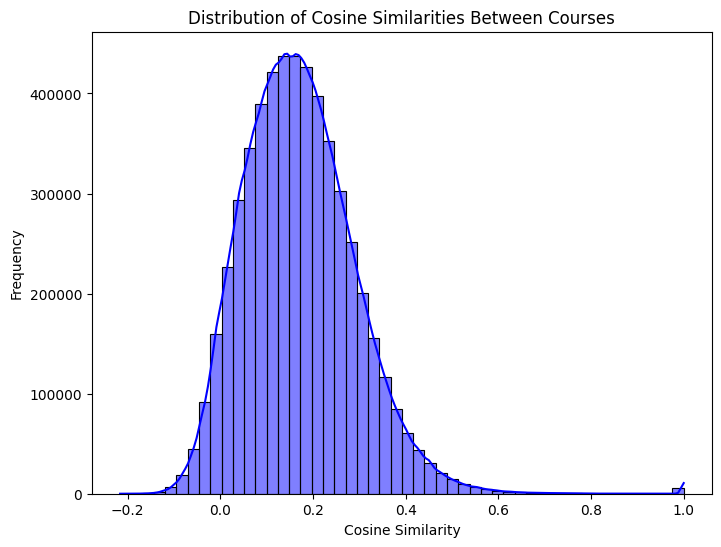

Mean Similarity: 0.1706
Median Similarity: 0.1622
Standard Deviation: 0.1199
Min Similarity: -0.2165
Max Similarity: 1.0000


In [ ]:

tril_indices = np.triu_indices_from(similarities, k=1)
similarities_upper = similarities[tril_indices]

similarities_upper = np.array(similarities_upper)
# find the optimize similarity number to filter
plt.figure(figsize=(8, 6))
sns.histplot(similarities_upper, kde=True, bins=50, color='blue')
plt.title("Distribution of Cosine Similarities Between Courses")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

mean_similarity = np.mean(similarities_upper)
median_similarity = np.median(similarities_upper)
std_similarity = np.std(similarities_upper)
min_similarity = np.min(similarities_upper)
max_similarity = np.max(similarities_upper)

print(f"Mean Similarity: {mean_similarity:.4f}")
print(f"Median Similarity: {median_similarity:.4f}")
print(f"Standard Deviation: {std_similarity:.4f}")
print(f"Min Similarity: {min_similarity:.4f}")
print(f"Max Similarity: {max_similarity:.4f}")